# Proyek Klasifikasi Gambar Inspeksi
* Nama : Derfansyah Guswiranata Kurnia
* Identitas dicoding: dgkurnia

# Instalasi kaggle

In [1]:
#akses google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#akses kaggle
!pip install kaggle

In [3]:
#fungsi pembuka akses
from google.colab import files
files.upload()

Saving akses_kaggle.json to akses_kaggle.json


{'akses_kaggle.json': b'{"username":"derfansyahgk","key":"24be196f622b75f71753aee422847c5c"}'}

In [4]:
# inisiasi file baru
!mkdir ~/.kaggle/
!cp akses_kaggle.json ~/.kaggle/

In [5]:
# Penyetelan rekomendasi
!chmod 600 ~/.kaggle/akses_kaggle.json

# Instalasi perpustakaan

In [6]:
#instalasi nyala
! pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [7]:
#instalasi tensorflow & keras
!pip install tensorflow keras

# Impor perpustakaan

## dasar

In [8]:
#impor perpustakaan dasar
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

In [10]:
#akses file zip
import zipfile
import shutil

In [11]:
#pembuatan titik simpan sementara
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint as mchp

In [12]:
#penghentian tiba-tiba
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

## kelompok tensorflow

In [13]:
#gambar
import os
import cv2
from PIL import Image

In [14]:
#dinamisasi pembelajaran
import torch.optim as optim
from sklearn.utils.class_weight import compute_sample_weight as csw #inspeksi berat dulu

In [15]:
#tensorflow
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras.preprocessing import image

In [16]:
#Performa
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Bagian lain

In [17]:
#optimasi
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [19]:
#matriks dll
from sklearn.utils.class_weight import compute_sample_weight as csw #inspeksi berat dulu
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [20]:
#waktu
import time
import datetime
import gc

# Impor dataset baru

## pengunduhan

In [21]:
# persiapan file 'task'
!mkdir /content/task #jalur penyimpanan utama

In [22]:
#impor secara aman
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 97% 591M/612M [00:04<00:00, 182MB/s]
100% 612M/612M [00:04<00:00, 155MB/s]


In [23]:
#pembukaan zip dengan shutil
def safe_unpacker(archive_path, extract_dir):
  # Pembukaan file
    if not os.path.exists(extract_dir):
        os.makedirs(extract_dir)

    try:
        shutil.unpack_archive(archive_path, extract_dir=extract_dir, format='zip')
    except Exception as e:
        print(f"Error unpacking archive: {e}")
        return False
    return True

In [25]:
#pembukaan file secara aman
nzip = '/content/gtsrb-german-traffic-sign.zip' #nama file zip
jlrzip = '/content/task' #jalur zip

In [26]:
#eksekusi
safe_unpacker(nzip, jlrzip)

True

In [27]:
#cek hasil
!ls /content/task

meta  Meta  Meta.csv  test  Test  Test.csv  train  Train  Train.csv


## Pemisahan file

In [28]:
#penyetelan gc
gc.collect()

34

## Pengaturan dua jenis file berbeda

# Bagian manajemen data

In [29]:
#inspeksi df (latihan)
dflth = pd.read_csv('/content/task/Train.csv')
dflthk = dflth.copy()
#bagian meta
dfmet = pd.read_csv('/content/task/Meta.csv')
dfmetk = dfmet.copy()
#pengujian
dfuji = pd.read_csv('/content/task/Test.csv')
dfujik = dfuji.copy()
#inspeksi meta

In [30]:
#sampel df
print("Dataset latihan:")
print(dflthk.head(6))



print("\ndataset pengujian:")
print(dfujik.head(6))


#Bagian meta
print("\ndataset meta:")
print(dfmet.head(6))

Dataset latihan:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   
5     31      27       6       5      26      22       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  
5  Train/20/00020_00000_00005.png  

dataset pengujian:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Te

In [31]:
#inspeksi bentuk df meta
inf_met = dfmetk.info() #meta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Path     43 non-null     object
 1   ClassId  43 non-null     int64 
 2   ShapeId  43 non-null     int64 
 3   ColorId  43 non-null     int64 
 4   SignId   42 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


ini adalah informasi referensi untuk lambang

### Bagian gambar

In [32]:
#deklarasi jalur gambar
met1 = '/content/task/Meta' #bagian meta 1
met2 = '/content/task/meta' #bagian meta 2
#jalur penyimpanan file

In [33]:
#jalur penyimpanan
dftrjlrlth = ['/content/task/Train', '/content/task/train'] #daftar jalur latihan (bagian 1 dan 2)
dftrjlruji = ['/content/task/Test', '/content/task/test'] #daftar jalur uji (bagian 1 dan 2)

In [34]:
#jalur cekpoin
cekpoin = '/content/drive/MyDrive/simpanan'

In [35]:
#deklarasi jalur
data = []
bntklabel = [] #bentuk label
kelas = 43
#jalur dokumen
jlrdok = os.getcwd()
jngkls = range(kelas)
#ke iterasi data

In [36]:
#iterasi penyimpanan di jalur latihan
for jalur_latih in dftrjlrlth:
  for i in os.listdir(jalur_latih):  # Jika i adalah label
        path = os.path.join(jalur_latih, str(i))
        images = os.listdir(path)

        for a in images:
            try:
                image = Image.open(os.path.join(path, a))
                image = image.resize((30, 30))
                image = np.array(image)
                data.append(image)
                bntklabel.append(i)
            except Exception as e:
                print(f"Error loading image {a}: {e}")#iterasi dalam jalur latihan

In [37]:
#fungsi di bangan jalur pengujian (dftrjlruji)
for jalur_uji in dftrjlruji:
    # Bagian jalur di daftar
    if os.path.isdir(jalur_uji):
        for i in os.listdir(jalur_uji):
            path = os.path.join(jalur_uji, str(i))
            # Inspeksi jalur
            if os.path.isdir(path):
                images = os.listdir(path)
                #iterasi di gambar
                for a in images:
                    try:
                        image = Image.open(os.path.join(path, a))
                        image = image.resize((30, 30))
                        image = np.array(image)
                        data.append(image)
                        bntklabel.append(i)
                    except Exception as e:
                        print(f"Error loading image {a}: {e}") #iterasi dalam jlr pengujian
    else:
        print(f"Skipping {jalur_uji} as it is not a directory.")

In [38]:
#inspeksi hasil
print("panjang data :", len(data))
print("panjang bentuk label :", len(bntklabel))

panjang data : 78418
panjang bentuk label : 78418


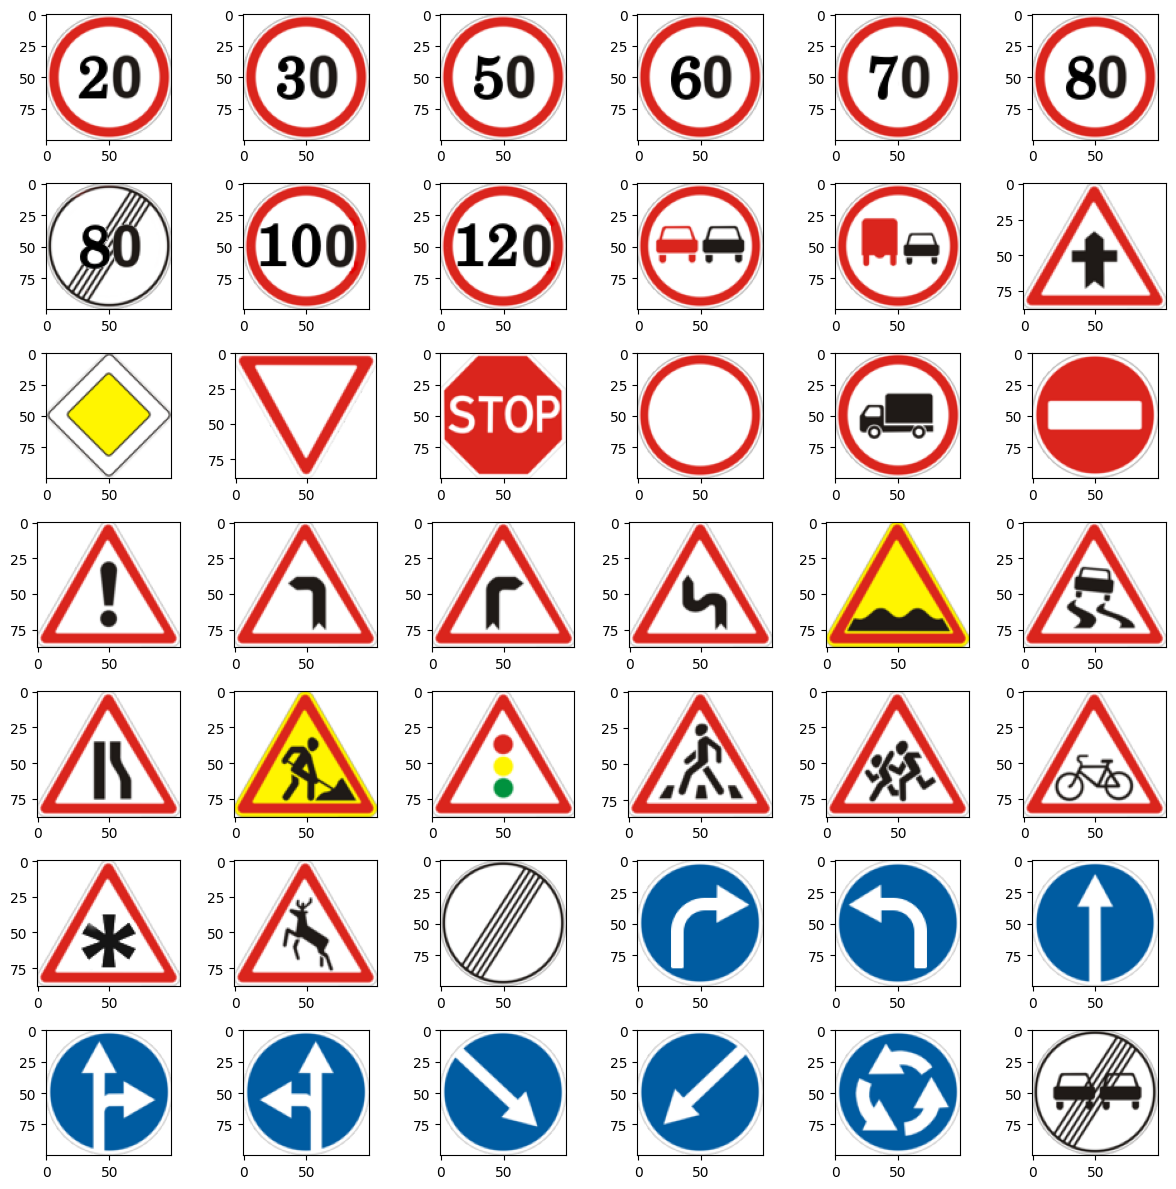

In [39]:
#inspeksi data meta
meta_sorted = dfmet.sort_values(by="ClassId").reset_index(drop=True)



fig, axs = plt.subplots(7, 6, figsize=(12, 12))

for i in range(42):

    img_path = os.path.join('/content/task', meta_sorted.iloc[i]["Path"])

    img = Image.open(img_path)

    axs[i // 6, i % 6].imshow(img)

plt.tight_layout()
plt.show()

ini menjadi penanda

## Persiapan fungsi pengatur waktu

In [40]:
#fungsi pengarue waktu
def date_editor(x):
   if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
   if x==2:
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
   if x==3:
        return 'Date now: %s' % datetime.datetime.now()
   if x==4:
        return 'Date today: %s' % datetime.date.today()

In [41]:
#pembuat grafik
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 10))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_editor(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    #bagian y1 dan y2
    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_editor(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

# Inisiasi model

## Pengubahan bentuk data ke barisan

In [42]:
#persiapan konversi
brsdata = np.array(data) #barisan data
brslabel = np.array(bntklabel) #barisan label

In [43]:
#aktivasi gc
gc.collect()

27

In [44]:
#inspeksi pembentukan label
print("bentuk barisan data ",brsdata.shape)
print("bentuk barisan label ",brslabel.shape)

bentuk barisan data  (78418, 30, 30, 3)
bentuk barisan label  (78418,)


## Fragmentasi df latihan & pengujian

In [45]:
# permisahan data
X_train, X_test, y_train, y_test = train_test_split(brsdata, brslabel, test_size=0.2, random_state=40, stratify=brslabel)

In [46]:
#implementasi berat latihan
bntkbrtlat = csw(class_weight='balanced', y=y_train) #bentuk berat latihan
bntkbrttes = csw(class_weight='balanced', y=y_test) #bentuk berat uji

In [47]:
#konversi ke numerik
ytr_num = to_categorical(pd.to_numeric(y_train)) #pelatihan
yts_num= to_categorical(pd.to_numeric(y_test)) #pengujian

## Persiapan nilai untuk inspeksi

### Persiapan metrik

In [48]:
#fungsi untuk presisi
def precision_m(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [49]:
#fungsi penghitung nilai panggilan balik
def recall_m(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (all_positives + K.epsilon())
    return recall

In [50]:
#fungsi penghitung nilai skor f1
def f1score_eval(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1_value = 2*((precision*recall)/(precision+recall+K.epsilon()))
    return f1_value

Urutan fungsi :
1. presisi
2. Panggilan balik
3. Skor F1

### Pembuatan model sekuensial

In [51]:
#penyetelan model sekuensial
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))
#ke kompilasi model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [155]:
#pangilan kelas penghentaian awal
class CustomEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto',
                 baseline=None, restore_best_weights=False,
                 min_precision=0.90, max_precision=0.955,
                 min_recall=0.90, max_recall=0.955,
                 min_f1=0.90, max_f1=0.955,
                 min_accuracy=0.90, max_accuracy=0.955):
        super(CustomEarlyStopping, self).__init__()
        #penyimpanan validasi data

        self.monitor = monitor
        self.patience = patience
        self.verbose = verbose
        self.min_delta = min_delta
        self.wait = 0
        self.stopped_epoch = 0
        self.restore_best_weights = restore_best_weights
        self.best_weights = None

        self.min_precision = min_precision
        self.max_precision = max_precision
        self.min_recall = min_recall
        self.max_recall = max_recall
        self.min_f1 = min_f1
        self.max_f1 = max_f1
        self.min_accuracy = min_accuracy
        self.max_accuracy = max_accuracy

        if mode not in ['auto', 'min', 'max']:
            print('EarlyStopping mode must be one of "auto", "min", or "max" '
                  'The mode will be set to "auto"')
            mode = 'auto'

        if mode == 'min':
            self.monitor_op = np.less
        elif mode == 'max':
            self.monitor_op = np.greater
        else:
            if 'acc' in self.monitor or self.monitor.startswith('fmeasure'):
                self.monitor_op = np.greater
            else:
                self.monitor_op = np.less

        if self.monitor_op == np.greater:
            self.min_delta *= 1
        else:
            self.min_delta *= -1

        self.baseline = baseline
        self.best = np.Inf if self.monitor_op == np.less else -np.Inf

    def on_train_begin(self, logs=None):
        # Allow instances to be re-used
        self.wait = 0
        self.stopped_epoch = 0
        if self.restore_best_weights:
            self.best_weights = None
        #nilai validasi awal
        self.validation_data = (X_test, yts_num)

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is None:
            print('Warning: Early stopping requires %s available!' % self.monitor)
            return

        if self.monitor_op(current - self.min_delta, self.best):
            self.best = current
            self.wait = 0
            if self.restore_best_weights:
                self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                if self.restore_best_weights:
                    if self.verbose > 0:
                        print('Restoring model weights from the end of the best epoch.')
                    self.model.set_weights(self.best_weights)

        #inisiasi diri sendiri
        #validation_data = self.model.validation_data
        # Perhitungan presisi pangilan balik dan hasil
        if self.validation_data is not None:
            # Get predicted probabilities
            y_pred_prob = self.model.predict(self.validation_data[0])
            # Koversi ke probabilitas
            y_pred = np.argmax(y_pred_prob, axis=1)
            # Kembali ke label
            y_true = np.argmax(self.validation_data[1], axis=1)


        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0, sample_weight=bntkbrttes)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0, sample_weight=bntkbrttes)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0, sample_weight=bntkbrttes)
        accuracy = accuracy_score(y_true, y_pred, sample_weight=bntkbrttes)

        print(f'Epoch {epoch+1}: Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}, Accuracy={accuracy:.4f}')

        # Check early stopping conditions
        if (self.min_precision <= precision <= self.max_precision and
            self.min_recall <= recall <= self.max_recall and
            self.min_f1 <= f1 <= self.max_f1 and
            self.min_accuracy <= accuracy <= self.max_accuracy):

            self.stopped_epoch = epoch
            self.model.stop_training = True
            print(f'Early stopping triggered at epoch {epoch+1} due to reaching target metrics.')


    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0 and self.verbose > 0:
            print('Epoch %05d: early stopping' % (self.stopped_epoch + 1))

## Eksekusi

In [156]:
#deklarasi berat dari csw
def csw(class_weight, y):
    if class_weight == 'balanced':
        classes = np.unique(y)
        class_weights = class_weight.compute_sample_weight(
            class_weight='balanced',
            y=y
        )
    else:
        class_weights = np.ones_like(y, dtype=np.float32)
    return class_weights

In [157]:
#inisiasi gc
gc.collect()

11445

In [158]:
#penyetelan
epochs = 40  # Jumlah epoch yang nail
batch_size = 72
#titik cekpoin
checkpoint_path = '/content/drive/MyDrive/simpanan/model_checkpoint.{epoch:02d}.h5'

In [159]:
#persiapan panggilan balik
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    verbose=1
)
#ke definisi adaptif

In [160]:
#penghentian awal
pangilan_awal = CustomEarlyStopping(
    monitor='val_accuracy',  # Indikator akurasi
    patience=8,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    mode='max',          # inspeksi akurasi
    restore_best_weights=True,
    min_precision=0.90,  # Minimum precision value
    max_precision=0.955, # Maximum precision value
    min_recall=0.90,     # Minimum recall value
    max_recall=0.955,    # Maximum recall value
    min_f1=0.90,         # Minimum F1 score value
    max_f1=0.955,        # Maximum F1 score value
    min_accuracy=0.90,   # Minimum accuracy value
    max_accuracy=0.955   # Maximum accuracy value
)

## Eksekusi

In [161]:
#insiasi gc
gc.collect()

0

In [162]:
#penyimpanan cekpoin
try:
    model = tf.keras.models.load_model(checkpoint_path)
    print("Model loaded from checkpoint.")
except OSError:
    print("No checkpoint found, creating a new model.")
    model = Sequential() # or model = fmodel if fmodel contains the model definition
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.15))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.20))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(43, activation='softmax'))
    # titik baru
    pass

No checkpoint found, creating a new model.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [163]:
# Kompilasi Adam
cusoptim = tf.keras.optimizers.Adam(learning_rate=3e-4, beta_1=0.95, beta_2=0.995, use_ema=True, ema_momentum=0.995)  #Optimasi terkostumisasi
#eksekusi kompilasi
model.compile(optimizer=cusoptim, run_eagerly=True,loss='categorical_crossentropy', metrics=['accuracy', precision_m, recall_m, f1score_eval])

In [164]:
#persiapan eksekusi
with tf.device('/GPU:0'):
  history1 = model.fit(
        X_train, ytr_num,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_test, yts_num),
        callbacks=[model_checkpoint_callback, pangilan_awal],
        sample_weight=bntkbrtlat
    )

Epoch 1/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.4272 - f1score_eval: 0.0182 - loss: 3.2096 - precision_m: 0.7316 - recall_m: 0.0093
Epoch 1: val_loss improved from inf to 0.18294, saving model to /content/drive/MyDrive/simpanan/model_checkpoint.01.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step
Epoch 1: Precision=0.9648, Recall=0.9617, F1=0.9614, Accuracy=0.9617
872/872 ━━━━━━━━━━━━━━━━━━━━ 501s 574ms/step - accuracy: 0.4275 - f1score_eval: 0.0182 - loss: 3.2075 - precision_m: 0.7318 - recall_m: 0.0093 - val_accuracy: 0.9617 - val_f1score_eval: 0.0431 - val_loss: 0.1829 - val_precision_m: 1.0000 - val_recall_m: 0.0220
Epoch 2/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.9404 - f1score_eval: 0.0431 - loss: 0.2174 - precision_m: 1.0000 - recall_m: 0.0220
Epoch 2: val_loss improved from 0.18294 to 0.04726, saving model to /content/drive/MyDrive/simpanan/model_checkpoint.02.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step
Epoch 2: Precision=0.9936, Recall=0.9935, F1=0.9935, Accuracy=0.9935
872/872 ━━━━━━━━━━━━━━━━━━━━ 511s 585ms/step - accuracy: 0.9404 - f1score_eval: 0.0431 - loss: 0.2174 - precision_m: 1.0000 - recall_m: 0.0220 - val_accuracy: 0.9911 - val_f1score_eval: 0.0451 - val_loss: 0.0473 - val_precision_m: 1.0000 - val_recall_m: 0.0231
Epoch 3/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.9693 - f1score_eval: 0.0447 - loss: 0.0962 - precision_m: 1.0000 - recall_m: 0.0229
Epoch 3: val_loss improved from 0.04726 to 0.02685, saving model to /content/drive/MyDrive/simpanan/model_checkpoint.03.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 58ms/step
Epoch 3: Precision=0.9946, Recall=0.9946, F1=0.9946, Accuracy=0.9946
872/872 ━━━━━━━━━━━━━━━━━━━━ 561s 585ms/step - accuracy: 0.9693 - f1score_eval: 0.0447 - loss: 0.0962 - precision_m: 1.0000 - recall_m: 0.0229 - val_accuracy: 0.9938 - val_f1score_eval: 0.0453 - val_loss: 0.0269 - val_precision_m: 1.0000 - val_recall_m: 0.0232
Epoch 4/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.9831 - f1score_eval: 0.0451 - loss: 0.0500 - precision_m: 1.0000 - recall_m: 0.0231
Epoch 4: val_loss did not improve from 0.02685
491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step
Epoch 4: Precision=0.9953, Recall=0.9952, F1=0.9952, Accuracy=0.9952
872/872 ━━━━━━━━━━━━━━━━━━━━ 548s 568ms/step - accuracy: 0.9831 - f1score_eval: 0.0451 - loss: 0.0500 - precision_m: 1.0000 - recall_m: 0.0231 - val_accuracy: 0.9931 - val_f1score_eval: 0.0453 - val_loss: 0.0305 - val_precision_m: 1.0000 - val_recall_m: 0.0232
Epoch 5/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step -

491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step
Epoch 5: Precision=0.9966, Recall=0.9966, F1=0.9966, Accuracy=0.9966
872/872 ━━━━━━━━━━━━━━━━━━━━ 514s 590ms/step - accuracy: 0.9843 - f1score_eval: 0.0452 - loss: 0.0499 - precision_m: 1.0000 - recall_m: 0.0231 - val_accuracy: 0.9957 - val_f1score_eval: 0.0454 - val_loss: 0.0185 - val_precision_m: 1.0000 - val_recall_m: 0.0232
Epoch 6/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.9871 - f1score_eval: 0.0453 - loss: 0.0450 - precision_m: 1.0000 - recall_m: 0.0232
Epoch 6: val_loss improved from 0.01847 to 0.01499, saving model to /content/drive/MyDrive/simpanan/model_checkpoint.06.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step
Epoch 6: Precision=0.9977, Recall=0.9977, F1=0.9977, Accuracy=0.9977
872/872 ━━━━━━━━━━━━━━━━━━━━ 543s 568ms/step - accuracy: 0.9871 - f1score_eval: 0.0453 - loss: 0.0450 - precision_m: 1.0000 - recall_m: 0.0232 - val_accuracy: 0.9969 - val_f1score_eval: 0.0454 - val_loss: 0.0150 - val_precision_m: 1.0000 - val_recall_m: 0.0232
Epoch 7/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.9915 - f1score_eval: 0.0453 - loss: 0.0255 - precision_m: 1.0000 - recall_m: 0.0232
Epoch 7: val_loss improved from 0.01499 to 0.01066, saving model to /content/drive/MyDrive/simpanan/model_checkpoint.07.h5


491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step
Epoch 7: Precision=0.9979, Recall=0.9978, F1=0.9978, Accuracy=0.9978
872/872 ━━━━━━━━━━━━━━━━━━━━ 511s 578ms/step - accuracy: 0.9915 - f1score_eval: 0.0453 - loss: 0.0255 - precision_m: 1.0000 - recall_m: 0.0232 - val_accuracy: 0.9978 - val_f1score_eval: 0.0454 - val_loss: 0.0107 - val_precision_m: 1.0000 - val_recall_m: 0.0232
Epoch 8/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.9913 - f1score_eval: 0.0454 - loss: 0.0275 - precision_m: 1.0000 - recall_m: 0.0232
Epoch 8: val_loss did not improve from 0.01066
491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step
Epoch 8: Precision=0.9972, Recall=0.9972, F1=0.9972, Accuracy=0.9972
872/872 ━━━━━━━━━━━━━━━━━━━━ 549s 564ms/step - accuracy: 0.9913 - f1score_eval: 0.0454 - loss: 0.0275 - precision_m: 1.0000 - recall_m: 0.0232 - val_accuracy: 0.9958 - val_f1score_eval: 0.0454 - val_loss: 0.0190 - val_precision_m: 1.0000 - val_recall_m: 0.0232
Epoch 9/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step -

491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step
Epoch 11: Precision=0.9979, Recall=0.9978, F1=0.9978, Accuracy=0.9978
872/872 ━━━━━━━━━━━━━━━━━━━━ 498s 571ms/step - accuracy: 0.9930 - f1score_eval: 0.0454 - loss: 0.0266 - precision_m: 1.0000 - recall_m: 0.0232 - val_accuracy: 0.9981 - val_f1score_eval: 0.0454 - val_loss: 0.0097 - val_precision_m: 1.0000 - val_recall_m: 0.0233
Epoch 12/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.9945 - f1score_eval: 0.0454 - loss: 0.0189 - precision_m: 1.0000 - recall_m: 0.0232
Epoch 12: val_loss did not improve from 0.00972
491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step
Epoch 12: Precision=0.9983, Recall=0.9982, F1=0.9982, Accuracy=0.9982
872/872 ━━━━━━━━━━━━━━━━━━━━ 503s 572ms/step - accuracy: 0.9945 - f1score_eval: 0.0454 - loss: 0.0189 - precision_m: 1.0000 - recall_m: 0.0232 - val_accuracy: 0.9980 - val_f1score_eval: 0.0454 - val_loss: 0.0120 - val_precision_m: 1.0000 - val_recall_m: 0.0232
Epoch 13/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/s

491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step
Epoch 21: Precision=0.9988, Recall=0.9988, F1=0.9988, Accuracy=0.9988
872/872 ━━━━━━━━━━━━━━━━━━━━ 546s 559ms/step - accuracy: 0.9954 - f1score_eval: 0.0454 - loss: 0.0277 - precision_m: 1.0000 - recall_m: 0.0232 - val_accuracy: 0.9990 - val_f1score_eval: 0.0454 - val_loss: 0.0095 - val_precision_m: 1.0000 - val_recall_m: 0.0233
Epoch 22/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.9972 - f1score_eval: 0.0454 - loss: 0.0114 - precision_m: 1.0000 - recall_m: 0.0233
Epoch 22: val_loss did not improve from 0.00952
491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step
Epoch 22: Precision=0.9985, Recall=0.9985, F1=0.9985, Accuracy=0.9985
872/872 ━━━━━━━━━━━━━━━━━━━━ 518s 578ms/step - accuracy: 0.9972 - f1score_eval: 0.0454 - loss: 0.0114 - precision_m: 1.0000 - recall_m: 0.0233 - val_accuracy: 0.9987 - val_f1score_eval: 0.0455 - val_loss: 0.0207 - val_precision_m: 1.0000 - val_recall_m: 0.0233
Epoch 23/40
872/872 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/s

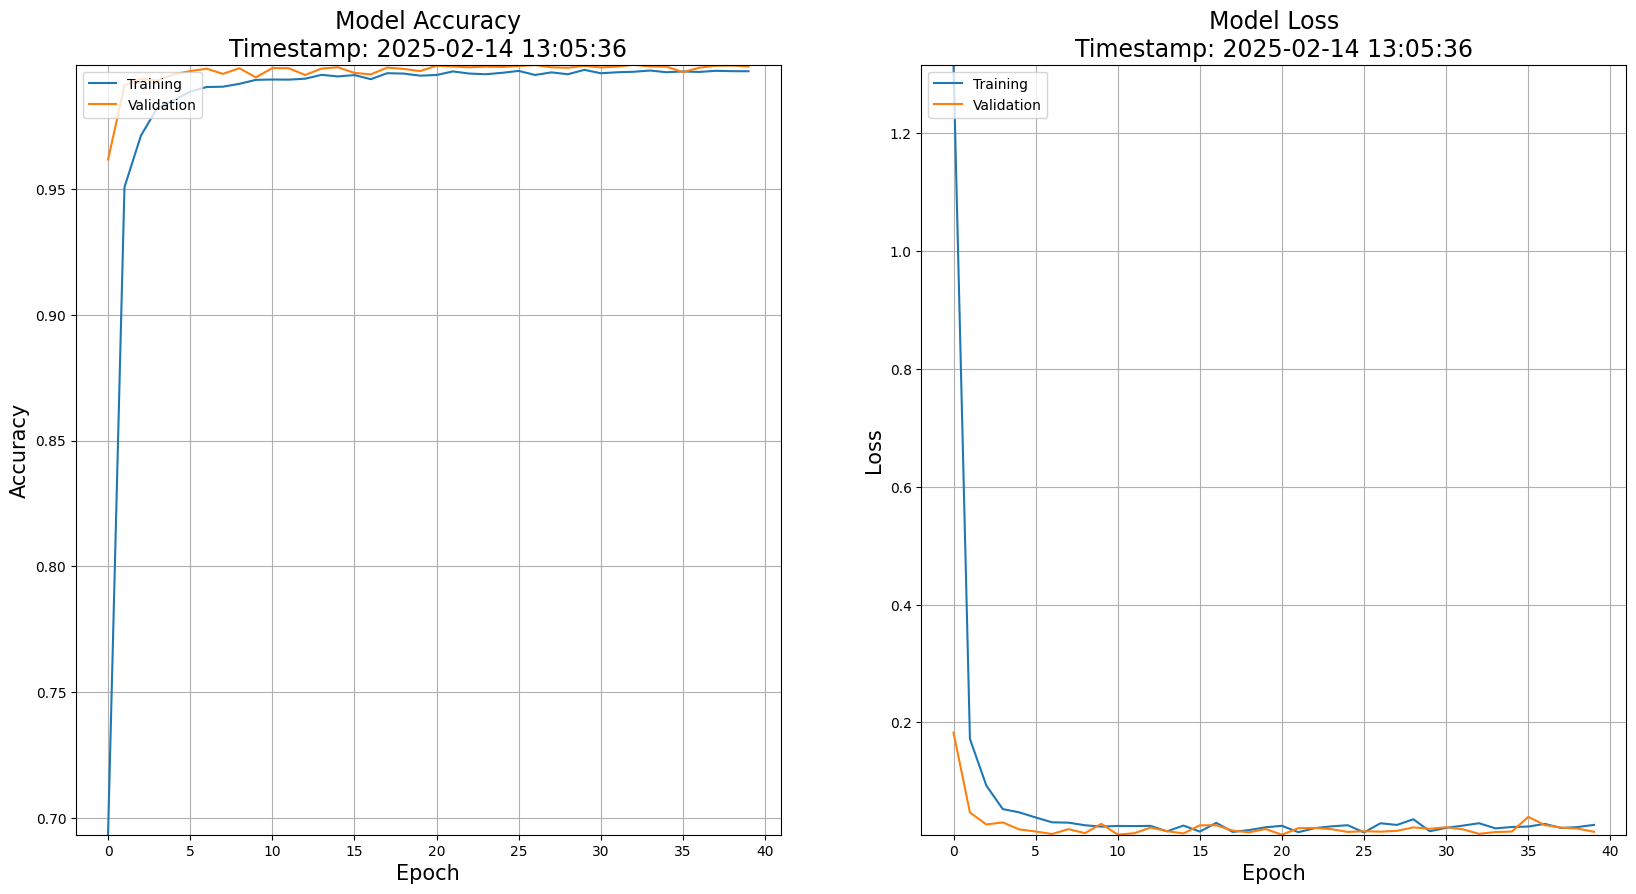

In [165]:
# viasualisasi hasil
plot_performance(history=history1)

## Eksekusi matriks

In [167]:
#persiapan prediksi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Kecendrungan kelas
y_ind = y_test  # Kelas kecendrungan

491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step


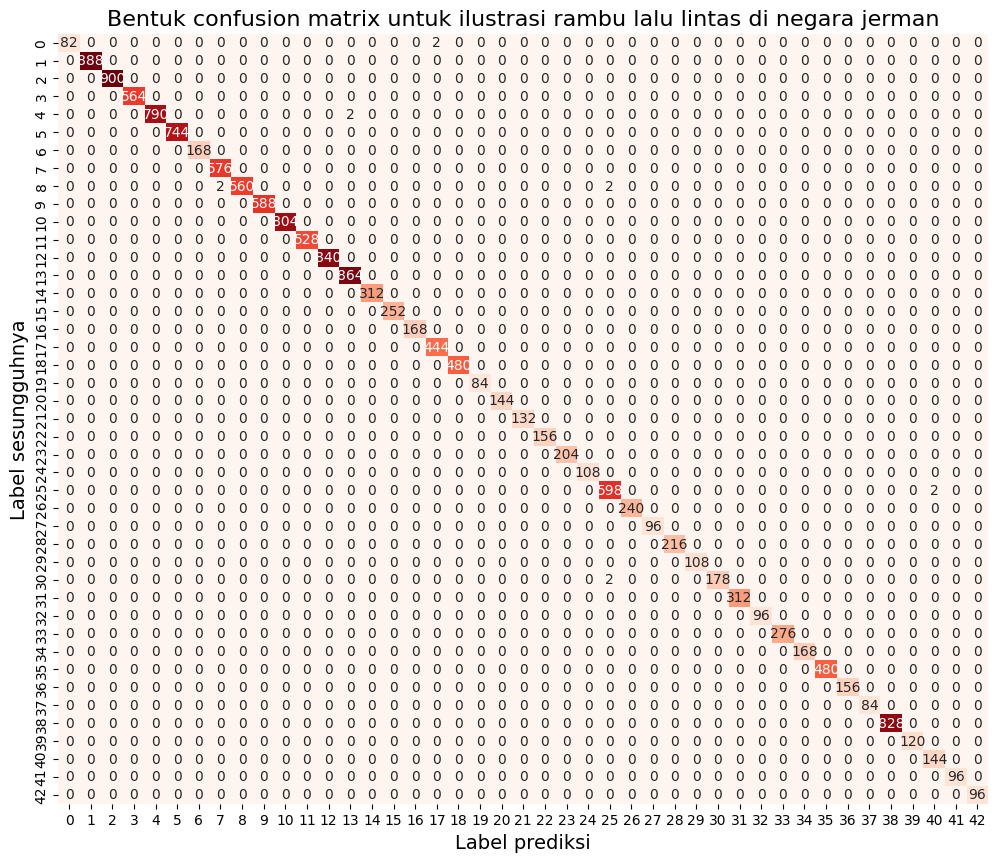

In [170]:
#pembentukan matriks
y_indnum = pd.to_numeric(y_ind)  # Konversi ke numerik untuk kecendrungan
conf_matrix = confusion_matrix(y_indnum, y_pred_classes)

# Inspeksi persebaran model
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=range(43), yticklabels=range(43))

plt.title("Bentuk confusion matrix untuk ilustrasi rambu lalu lintas di negara jerman", fontsize=16)
plt.xlabel("Label prediksi", fontsize=14)
plt.ylabel("Label sesungguhnya", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Pengujian di hasil tes

## Inisiasi pengujian

In [172]:
#deklarasi data tes
lblX = dfujik['ClassId'].copy()
lbly = dfujik['Path'].copy()
#nilai label
nilX = lblX.values
nily = lbly.values
#ke inspeksi laporan

In [174]:
#penyimpanan inspeksi data
result = []
csize = (30,30) #ukuran kompresi
#iterasi inspeksi
with tf.device('/GPU:0'):
  for img in nily: #iterasi nilai y
      image_path = os.path.join(jlrzip, img)
      images = Image.open(image_path)
      images = images.resize(csize) #kompresi
      result.append(np.array(images)) #penyimpanan hasil inspeksi satu-satu
#deklarasi sumbu X uji coba lokal

### Eksekusi pengujian

In [175]:
#Sumbu X dan y saat uji coba
X_ujcb = np.array(result) #persiapan uji coba di
y_ujcb = np.array(nilX) #uji coba lokal untuk identitas

In [177]:
#eksekusi pengujian
with tf.device('/GPU:0'):
    y_ujcb_encoded = to_categorical(y_ujcb, num_classes=43)
    loss, accuracy, precision, recall, f1_score = model.evaluate(X_ujcb, y_ujcb_encoded, verbose=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.9828 - f1score_eval: 0.0454 - loss: 0.4018 - precision_m: 1.0000 - recall_m: 0.0233


In [178]:
#cetak hasil
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1 Score: {f1_score:.4f}')

Test Loss: 0.4820
Test Accuracy: 0.9817
Test Precision: 1.0000
Test Recall: 0.0232
Test F1 Score: 0.0454


# Penyimpanan & Konversi model

## penyimpanan lokal

In [ ]:
#persiapan penyimpanan
dirlok = '/content/drive/MyDrive/colab'
#

# Persiapan file 'requirement.txt'

In [179]:
#tahap awal: inisiasi
!pip install package_name

  Preparing metadata (setup.py) ... done
  Created wheel for package_name: filename=package_name-0.1-py3-none-any.whl size=1229 sha256=2ae8a24badba358f3f16fbbe50662b1e12ae8a70e725c7037d417e13c4503d2b
  Stored in directory: /root/.cache/pip/wheels/b3/c1/6f/538e951eb00f535f43151173b4c55e463a35c17b9e90ab3b1a
Successfully built package_name


In [181]:
#persiapan 'keperluan.txt'
!pip freeze > requirements-n.txt #deklarasi catatan

In [182]:
#pengunduhan 'keperluan'
from google.colab import files
files.download('requirements-n.txt') #ekstraksi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>